# Feature Extraction (Deep Learning Features)

## Part 1

**Author**: Maleakhi Agung Wijaya  
**Email**: maw219@cam.ac.uk  
**Description**: This file contains code for extracting deep learning features. We considered using pre-trained neural networks as feature extractors. In part 1, we do not consider any fine tuning or data augmentation. The fine tuning, augmentation, and the use of autoencoders are discussed in part 2 and 3.

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px
import plotly.graph_objects as go
import scipy.io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
import pickle
from scipy.spatial.distance import cdist
from sklearn.decomposition import IncrementalPCA, TruncatedSVD
from sklearn.random_projection import SparseRandomProjection

# Images
import os
import cv2
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.style as style
from skimage.io import imread, imshow
import re

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models, backend as K, callbacks
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import InceptionV3, ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

In [8]:
%run Utilities.ipynb

## Load and Preprocess Dataset

This section loads shell images one-by-one and concatenate the forward and rear image.

In [9]:
filenames = sorted(os.listdir(SHELL_IMAGES_DATA))
X_species, y_species = preprocess_x_y(filenames)
le = LabelEncoder()
y_species = le.fit_transform(y_species)

1


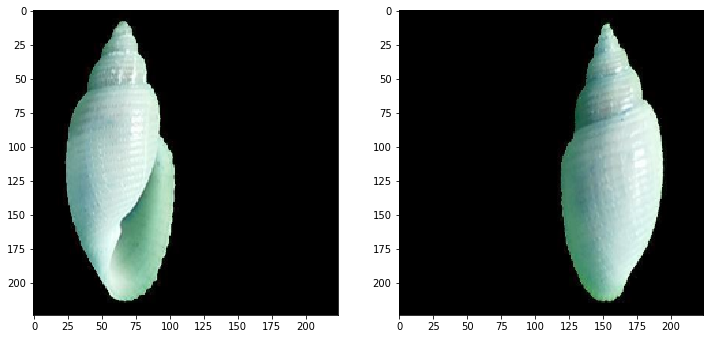

In [4]:
# Test visualise image
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
print(y_species[12])
image1 = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_species[12][0]))
image2 = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_species[12][1]))
ax1.imshow(image1)
ax2.imshow(image2)

plt.show()

## VGG16

This section load the VGG16 architecture with Imagenet weight to be used as feature extractor.

In [5]:
VGG_model = VGG16(weights="imagenet", include_top=True, input_shape=(224, 224, 3))

In [6]:
# Set non trainable in our case
for layer in VGG_model.layers:
    layer.trainable=False

In [7]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
# Get outputs from various layers of neural networks
# Convolutional block
block1_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block1_pool").output)
block2_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block2_pool").output)
block3_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block3_pool").output)
block4_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block4_pool").output)
block5_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block5_pool").output)

# Dense block
fc1_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("fc1").output)
fc2_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("fc2").output)

### Feature Extraction

We extract features using pre-trained VGG16. We consider each convolutional and dense blocks as feature extraction. We aim to compare their performance.

**A**

In [9]:
# Store features
X_features_block1_a = []
X_features_block2_a = []
X_features_block3_a = []
X_features_block4_a = []
X_features_block5_a = []
X_features_fc1_a = []
X_features_fc2_a = []

In [10]:
### This cells only for extracting A (cannot do both at the same time,
# memory issue)
for X in tqdm(X_species):
    X_a = X[0] # A position
    
    # Open the image in gray scale
    image_a = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_a), cv2.IMREAD_COLOR)
    
    # Preprocess the image
    image_a = cv2.resize(image_a, (224, 224))
    
    image_a = cv2.cvtColor(image_a, cv2.COLOR_RGB2BGR)
    image_a = image_a / 255.0
    image_a = np.reshape(image_a, (-1, 224, 224, 3))
    
    # Block 1 - fc
#     X_features_block1_a.append(block1_model.predict(image_a).flatten())
#     X_features_block2_a.append(block2_model.predict(image_a))
#     X_features_block3_a.append(block3_model.predict(image_a))
#     X_features_block4_a.append(block4_model.predict(image_a))
#     X_features_block5_a.append(block5_model.predict(image_a))
    
#     X_features_fc1_a.append(fc1_model.predict(image_a))
#     X_features_fc2_a.append(fc2_model.predict(image_a))

In [ ]:
## Save objects
# np.save("../results/vgg16_block2a.pickle", X_features_block2_a)
# np.save("../results/vgg16_block3a.pickle", X_features_block3_a)
# save_object(X_features_block4_a, "../results/vgg16_block4a.pickle")
# save_object(X_features_block5_a, "../results/vgg16_block5a.pickle")

# save_object(X_features_fc1_a, "../results/vgg16_fc1a.pickle")
# save_object(X_features_fc2_a, "../results/vgg16_fc2a.pickle")

In [12]:
# # Load objects
# vgg16_block2a = np.load("../results/vgg16_block2a.pickle.npy")
# vgg16_block3a = np.load("../results/vgg16_block3a.pickle.npy")
# vgg16_block4a = load_object("../results/vgg16_block4a.pickle")
# vgg16_block5a = load_object("../results/vgg16_block5a.pickle")
# vgg16_fc1a = load_object("../results/vgg16_fc1a.pickle")
# vgg16_fc2a = load_object("../results/vgg16_fc2a.pickle")

**B**

In [9]:
X_features_block1_b = []
X_features_block2_b = []
X_features_block3_b = []
X_features_block4_b = []
X_features_block5_b = []
X_features_fc1_b = []
X_features_fc2_b = []

In [10]:
### This cells only for extracting A (cannot do both at the same time,
# memory issue)
for X in tqdm(X_species):
    X_a = X[1] # B position
    
    # Open the image in gray scale
    image_a = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_a), cv2.IMREAD_COLOR)
    
    # Preprocess the image
    image_a = cv2.resize(image_a, (224, 224))
    
    image_a = cv2.cvtColor(image_a, cv2.COLOR_RGB2BGR)
    image_a = image_a / 255.0
    image_a = np.reshape(image_a, (-1, 224, 224, 3))
    
    # Block 1 - fc
#     X_features_block1_b.append(block1_model.predict(image_a))
#     X_features_block2_b.append(block2_model.predict(image_a))
#     X_features_block3_b.append(block3_model.predict(image_a))
#     X_features_block4_b.append(block4_model.predict(image_a))
#     X_features_block5_b.append(block5_model.predict(image_a))
    
#     X_features_fc1_b.append(fc1_model.predict(image_a))
#     X_features_fc2_b.append(fc2_model.predict(image_a))

In [11]:
## Save objects
# np.save("../results/vgg16_block2b.pickle", X_features_block2_b)
# np.save("../results/vgg16_block3b.pickle", X_features_block3_b)
# save_object(X_features_block4_b, "../results/vgg16_block4b.pickle")
# save_object(X_features_block5_b, "../results/vgg16_block5b.pickle")

# save_object(X_features_fc1_b, "../results/vgg16_fc1b.pickle")
# save_object(X_features_fc2_b, "../results/vgg16_fc2b.pickle")

In [38]:
# # Load objects
# # vgg16_block2b = np.load("../results/vgg16_block2b.pickle.npy")
# # vgg16_block3b = np.load("../results/vgg16_block3b.pickle.npy")
# vgg16_block4b = load_object("../results/vgg16_block4b.pickle")
# vgg16_block5b = load_object("../results/vgg16_block5b.pickle")
# vgg16_fc1b = load_object("../results/vgg16_fc1b.pickle")
# vgg16_fc2b = load_object("../results/vgg16_fc2b.pickle")

### Further Preprocessing

We further preprocessing the extracted features for later to be used for classification.

**Block3**

We load features extracted when using block3 VGG16 outputs as the deep learning feature representation.

In [5]:
vgg16_block3b = load_object("../results/vgg16_block3b.pickle")
vgg16_block3a = load_object("../results/vgg16_block3a.pickle")

# Reshape 
X_block3a = np.reshape(vgg16_block3a, (1340, -1))
X_block3b = np.reshape(vgg16_block3b, (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_block3a = pca.fit_transform(X_block3a)
X_block3b = pca.fit_transform(X_block3b)

# Check shape
print(X_block3a.shape)
print(X_block3b.shape)

# Concatenate A and B and save object
X_block3 = np.concatenate((X_block3a, X_block3b), axis=1)
# save_object(X_block3, "../results/X_block3_vgg16.pickle")

(1340, 696)
(1340, 669)


In [44]:
# Load
X_block3 = load_object("../results/X_block3_vgg16.pickle")
scaler = StandardScaler()
X_block3_scaled = scaler.fit_transform(X_block3)

**Block4**

We load features extracted when using block4 VGG16 outputs as the deep learning feature representation.

In [19]:
vgg16_block4b = load_object("../results/vgg16_block4b.pickle")
vgg16_block4a = load_object("../results/vgg16_block4a.pickle")

# Reshape 
X_block4a = np.reshape(np.array(vgg16_block4a), (1340, -1))
X_block4b = np.reshape(np.array(vgg16_block4b), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_block4a = pca.fit_transform(X_block4a)
X_block4b = pca.fit_transform(X_block4b)

# Check shape
print(X_block4a.shape)
print(X_block4b.shape)

# Concatenate A and B and save object
X_block4 = np.concatenate((X_block4a, X_block4b), axis=1)
# save_object(X_block4, "../results/X_block4_vgg16.pickle")

(1340, 422)
(1340, 395)


In [45]:
# Load
X_block4 = load_object("../results/X_block4_vgg16.pickle")
scaler = StandardScaler()
X_block4_scaled = scaler.fit_transform(X_block4)

**Block5**

We load features extracted when using block5 VGG16 outputs as the deep learning feature representation.

In [5]:
vgg16_block5b = load_object("../results/vgg16_block5b.pickle")
vgg16_block5a = load_object("../results/vgg16_block5a.pickle")

# Reshape 
X_block5a = np.reshape(np.array(vgg16_block5a), (1340, -1))
X_block5b = np.reshape(np.array(vgg16_block5b), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_block5a = pca.fit_transform(X_block5a)
X_block5b = pca.fit_transform(X_block5b)

# Check shape
print(X_block5a.shape)
print(X_block5b.shape)

# Concatenate A and B and save object
X_block5 = np.concatenate((X_block5a, X_block5b), axis=1)
# save_object(X_block5, "../results/X_block5_vgg16.pickle")

In [46]:
# Load
X_block5 = load_object("../results/X_block5_vgg16.pickle")
scaler = StandardScaler()
X_block5_scaled = scaler.fit_transform(X_block5)

**FC1**

We load features extracted when using FC1 VGG16 outputs as the deep learning feature representation.

In [15]:
vgg16_fc1b = load_object("../results/vgg16_fc1b.pickle")
vgg16_fc1a = load_object("../results/vgg16_fc1a.pickle")

# Reshape 
X_fc1b = np.reshape(np.array(vgg16_fc1b), (1340, -1))
X_fc1a = np.reshape(np.array(vgg16_fc1a), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_fc1a = pca.fit_transform(X_fc1a)
X_fc1b = pca.fit_transform(X_fc1b)

# Check shape
print(X_fc1a.shape)
print(X_fc1b.shape)

# Concatenate A and B and save object
X_fc1 = np.concatenate((X_fc1a, X_fc1b), axis=1)
# save_object(X_fc1, "../results/X_fc1_vgg16.pickle")

(1340, 61)
(1340, 59)


In [47]:
# Load
X_fc1 = load_object("../results/X_fc1_vgg16.pickle")
scaler = StandardScaler()
X_fc1_scaled = scaler.fit_transform(X_fc1)

**FC2**

We load features extracted when using FC2 VGG16 outputs as the deep learning feature representation.

In [17]:
vgg16_fc2b = load_object("../results/vgg16_fc2b.pickle")
vgg16_fc2a = load_object("../results/vgg16_fc2a.pickle")

# Reshape 
X_fc2b = np.reshape(np.array(vgg16_fc2b), (1340, -1))
X_fc2a = np.reshape(np.array(vgg16_fc2a), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_fc2a = pca.fit_transform(X_fc2a)
X_fc2b = pca.fit_transform(X_fc2b)

# Check shape
print(X_fc2a.shape)
print(X_fc2b.shape)

# Concatenate A and B and save object
X_fc2 = np.concatenate((X_fc2a, X_fc2b), axis=1)
# save_object(X_fc2, "../results/X_fc2_vgg16.pickle")

(1340, 31)
(1340, 30)


In [48]:
# Load
X_fc2 = load_object("../results/X_fc2_vgg16.pickle")
scaler = StandardScaler()
X_fc2_scaled = scaler.fit_transform(X_fc2)

### Classification

#### Standard ML Models

In [49]:
## Hyperparameter configurations and result storage
param_grid_svc = {
    # random search varying the parameter
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': ["scale", "auto"], 
    'kernel': ["rbf", "linear"]
}

param_grid_rf = { 
    'n_estimators': [10, 100, 200],
    'criterion' :['gini', 'entropy']
}

# Used to store results for different feature sets
list_dict_results = []

In [50]:
## Loop configuration
feature_sets = [
    (X_block3_scaled, y_species),
    (X_block4_scaled, y_species),
    (X_block5_scaled, y_species),
    (X_fc1_scaled, y_species),
    (X_fc2_scaled, y_species),
]
feature_sets_name = [
    "Block 3 scaled",
    "Block 4 scaled",
    "Block 5 scaled",
    "FC1 scaled",
    "FC2 scaled",
]

## Classifier and hyperparameter loops
param_grids = [param_grid_svc, param_grid_rf]
classifiers_name = ["svc", "rf"]
classifiers = [SVC(), RandomForestClassifier()]
cmaps = ["plasma", "viridis"]

**************************************************
Block 3 scaled
------------------------------
svc
Accuracy: 0.7992537313432836
F1: 0.8193498964363736


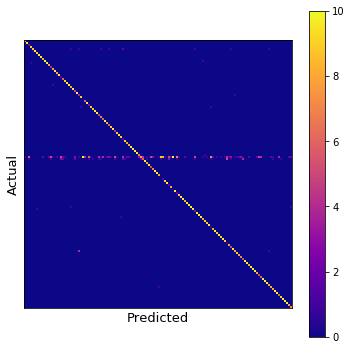


------------------------------
rf
Accuracy: 0.9350746268656716
F1: 0.9290049751243782


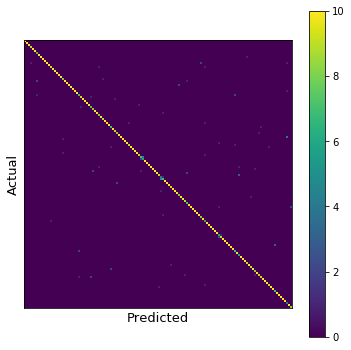


**************************************************
Block 4 scaled
------------------------------
svc
Accuracy: 0.9298507462686567
F1: 0.9321285728221638


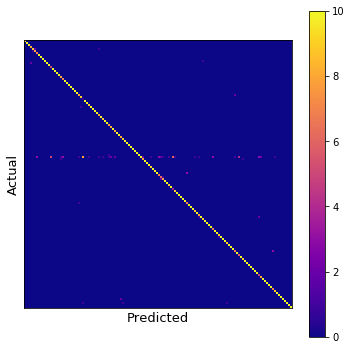


------------------------------
rf
Accuracy: 0.9350746268656718
F1: 0.9263823738450604


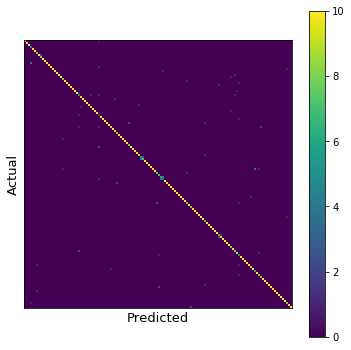


**************************************************
Block 5 scaled
------------------------------
svc
Accuracy: 0.9440298507462686
F1: 0.9380668088130774


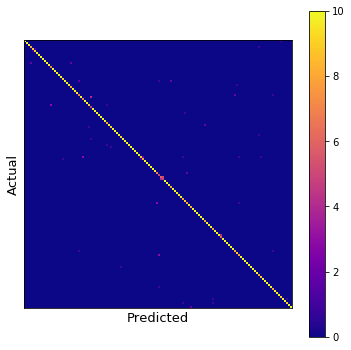


------------------------------
rf
Accuracy: 0.9447761194029851
F1: 0.9393532338308457


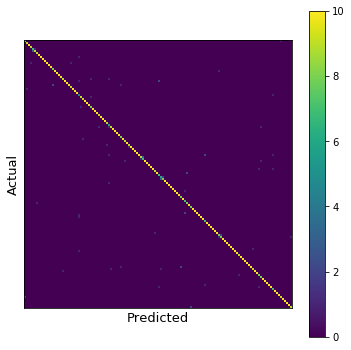


**************************************************
FC1 scaled
------------------------------
svc
Accuracy: 0.9574626865671642
F1: 0.9543781094527363


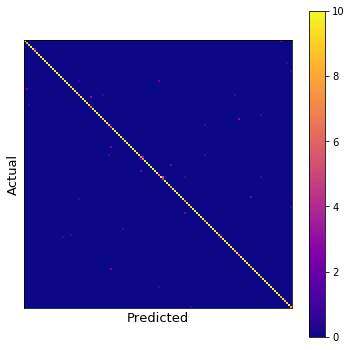


------------------------------
rf
Accuracy: 0.9432835820895523
F1: 0.9388130774697938


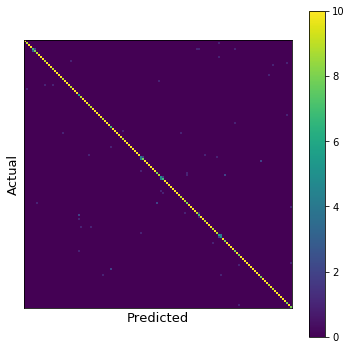


**************************************************
FC2 scaled
------------------------------
svc
Accuracy: 0.9611940298507463
F1: 0.9582231698649608


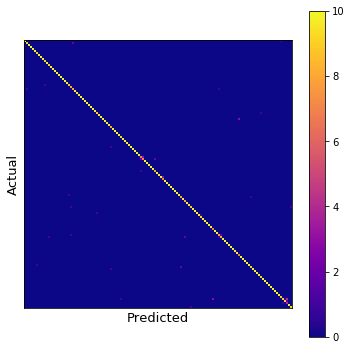


------------------------------
rf
Accuracy: 0.9380597014925373
F1: 0.9307960199004974


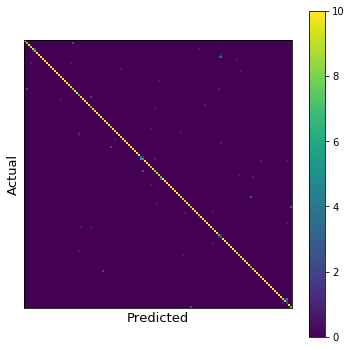

In [51]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    # Iterate over different classifiers
    for classifier, classifier_name, param_grid, cmap in zip(classifiers, 
                                                             classifiers_name, 
                                                             param_grids,
                                                             cmaps):
        print("-"*30)
        print(classifier_name)

        list_acc, list_cm, list_f1, list_cv_results = nested_cv_sklearn(classifier, param_grid, X, y, 5)
        # Add data to dict_results
        dict_results["accuracy"].append(list_acc)
        dict_results["f1"].append(list_f1)
        dict_results["cv_results"].append(list_cv_results)
        dict_results["cm"].append(list_cm)

        # Display accuracy, f1, confusion matrix
        print(f"Accuracy: {np.mean(list_acc)}")
        print(f"F1: {np.mean(list_f1)}")
        cm = sum(list_cm)

        plot_confusion_matrix(cm, cmap=cmap)

        print()
    
    list_dict_results.append(dict_results)

#### Neural Networks

In [52]:
## Loop configuration
feature_sets = [
    (X_block3_scaled, y_species),
    (X_block4_scaled, y_species),
    (X_block5_scaled, y_species),
    (X_fc1_scaled, y_species),
    (X_fc2_scaled, y_species),
]
feature_sets_name = [
    "Block 3 scaled",
    "Block 4 scaled",
    "Block 5 scaled",
    "FC1 scaled",
    "FC2 scaled",
]

In [53]:
# Neural network configuration (simple one for standard)
# see more complex version on utilities.ipynb that are evaluated
# on other files.
optimizer = keras.optimizers.Adam()
batch_size = 64
no_epochs = 200

**************************************************
Block 3 scaled
Accuracy: 0.8380597014925375
F1: 0.7995925136223643


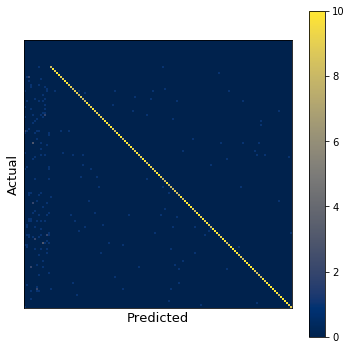


**************************************************
Block 4 scaled
Accuracy: 0.8798507462686567
F1: 0.8423809523809525


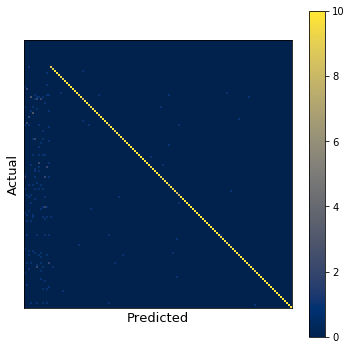


**************************************************
Block 5 scaled
Accuracy: 0.8865671641791046
F1: 0.8494740582800283


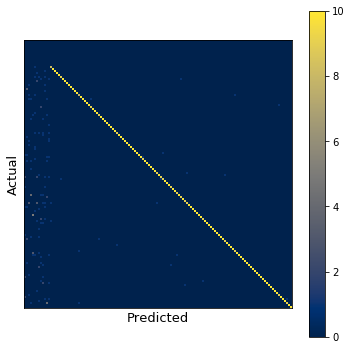


**************************************************
FC1 scaled
Accuracy: 0.8888059701492537
F1: 0.8543638948116559


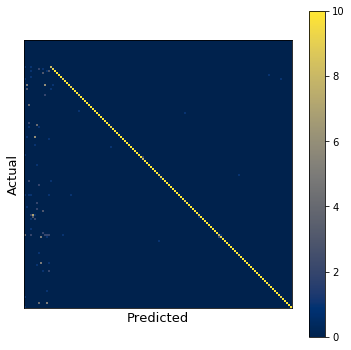


**************************************************
FC2 scaled
Accuracy: 0.8850746268656717
F1: 0.8511419095001184


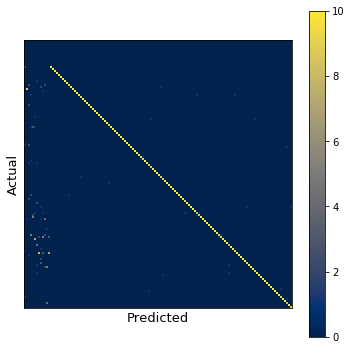

In [54]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    
    # Neural network training
    X = np.array(X)
    y = np.array(y)
    
    # Simple model definition
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(134, activation="softmax"),
        ]
    )
    
    for train, test in kfold.split(X, y):
        model.compile(loss="sparse_categorical_crossentropy",
                     optimizer=optimizer,
                     metrics=["accuracy"])
        
        # Valid data
        valid_range = int(0.1 * len(train))
        valid = train[:valid_range]
        train = train[valid_range:]
        
        # Early stopping callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0, patience=50,
            mode="auto", restore_best_weights=False
        )
        
        # Fit data to model
        history = model.fit(X[train], y[train],
                  batch_size=batch_size,
                  epochs=no_epochs, verbose=0, 
                  validation_data=(X[valid], y[valid]),
                  callbacks=[early_stopping])
        
        # Generate generalisation metrics
        pred = model.predict(X[test])
        pred = np.argmax(pred, axis=1)
        cm = confusion_matrix(pred, y[test])
        acc = accuracy_score(pred, y[test])
        f1 = f1_score(pred, y[test], average="macro")
        
        # Add data to dict results
        dict_results["accuracy"].append(acc)
        dict_results["f1"].append(f1)
        dict_results["cm"].append(cm)
        
    # Display accuracy, f1, confusion matrix
    print(f"Accuracy: {np.mean(dict_results['accuracy'])}")
    print(f"F1: {np.mean(dict_results['f1'])}")
    plot_confusion_matrix(sum(dict_results['cm']), cmap="cividis")

    print()

    list_dict_results.append(dict_results)

## VGG19

This section load the VGG19 architecture with Imagenet weight to be used as feature extractor.

In [16]:
VGG_model = VGG19(weights="imagenet", include_top=True, input_shape=(224, 224, 3))

574717952/574710816 [==============================] - 30s 0us/step


In [19]:
# Set non trainable in our case
for layer in VGG_model.layers:
    layer.trainable=False

In [20]:
VGG_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
# Get outputs from various layers of neural networks
# Convolutional block
block1_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block1_pool").output)
block2_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block2_pool").output)
block3_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block3_pool").output)
block4_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block4_pool").output)
block5_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block5_pool").output)

# Dense block
fc1_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("fc1").output)
fc2_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("fc2").output)

### Feature Extraction

We extract features using pre-trained VGG16. We consider each convolutional and dense blocks as feature extraction. We aim to compare their performance.

**A**

In [22]:
# Store features
X_features_block1_a = []
X_features_block2_a = []
X_features_block3_a = []
X_features_block4_a = []
X_features_block5_a = []
X_features_fc1_a = []
X_features_fc2_a = []

In [23]:
### This cells only for extracting A (cannot do both at the same time,
# memory issue)
for X in tqdm(X_species):
    X_a = X[0] # A position
    
    # Open the image in gray scale
    image_a = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_a), cv2.IMREAD_COLOR)
    
    # Preprocess the image
    image_a = cv2.resize(image_a, (224, 224))
    
    image_a = cv2.cvtColor(image_a, cv2.COLOR_RGB2BGR)
    image_a = image_a / 255.0
    image_a = np.reshape(image_a, (-1, 224, 224, 3))
    
    # Block 1 - fc
#     X_features_block1_a.append(block1_model.predict(image_a).flatten())
#     X_features_block2_a.append(block2_model.predict(image_a))
#     X_features_block3_a.append(block3_model.predict(image_a))
    X_features_block4_a.append(block4_model.predict(image_a))
    X_features_block5_a.append(block5_model.predict(image_a))
    
    X_features_fc1_a.append(fc1_model.predict(image_a))
    X_features_fc2_a.append(fc2_model.predict(image_a))

In [24]:
## Save objects
save_object(X_features_block4_a, "../results/vgg19_block4a.pickle")
save_object(X_features_block5_a, "../results/vgg19_block5a.pickle")

save_object(X_features_fc1_a, "../results/vgg19_fc1a.pickle")
save_object(X_features_fc2_a, "../results/vgg19_fc2a.pickle")

**B**

In [25]:
X_features_block1_b = []
X_features_block2_b = []
X_features_block3_b = []
X_features_block4_b = []
X_features_block5_b = []
X_features_fc1_b = []
X_features_fc2_b = []

In [26]:
### This cells only for extracting A (cannot do both at the same time,
# memory issue)
for X in tqdm(X_species):
    X_a = X[1] # B position
    
    # Open the image in gray scale
    image_a = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_a), cv2.IMREAD_COLOR)
    
    # Preprocess the image
    image_a = cv2.resize(image_a, (224, 224))
    
    image_a = cv2.cvtColor(image_a, cv2.COLOR_RGB2BGR)
    image_a = image_a / 255.0
    image_a = np.reshape(image_a, (-1, 224, 224, 3))
    
    # Block 1 - fc
#     X_features_block1_b.append(block1_model.predict(image_a))
#     X_features_block2_b.append(block2_model.predict(image_a))
#     X_features_block3_b.append(block3_model.predict(image_a))
    X_features_block4_b.append(block4_model.predict(image_a))
    X_features_block5_b.append(block5_model.predict(image_a))
    
    X_features_fc1_b.append(fc1_model.predict(image_a))
    X_features_fc2_b.append(fc2_model.predict(image_a))

In [27]:
## Save objects
save_object(X_features_block4_b, "../results/vgg19_block4b.pickle")
save_object(X_features_block5_b, "../results/vgg19_block5b.pickle")

save_object(X_features_fc1_b, "../results/vgg19_fc1b.pickle")
save_object(X_features_fc2_b, "../results/vgg19_fc2b.pickle")

### Further Preprocessing

We further preprocessing the extracted features for later to be used for classification.

**Block3**

We load features extracted when using block3 VGG19 outputs as the deep learning feature representation.

In [7]:
vgg19_block3b = load_object("../results/vgg19_block3b.pickle")
vgg19_block3a = load_object("../results/vgg19_block3a.pickle")

# Reshape 
X_block3a = np.reshape(vgg19_block3a, (1340, -1))
X_block3b = np.reshape(vgg19_block3b, (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_block3a = pca.fit_transform(X_block3a)
X_block3b = pca.fit_transform(X_block3b)

# Check shape
print(X_block3a.shape)
print(X_block3b.shape)

# Concatenate A and B and save object
X_block3 = np.concatenate((X_block3a, X_block3b), axis=1)
save_object(X_block3, "../results/X_block3_vgg19.pickle")

(1340, 427)
(1340, 402)


In [55]:
# Load
X_block3 = load_object("../results/X_block3_vgg19.pickle")
scaler = StandardScaler()
X_block3_scaled = scaler.fit_transform(X_block3)

**Block4**

We load features extracted when using block4 VGG19 outputs as the deep learning feature representation.

In [5]:
vgg19_block4b = load_object("../results/vgg19_block4b.pickle")
vgg19_block4a = load_object("../results/vgg19_block4a.pickle")

# Reshape 
X_block4a = np.reshape(np.array(vgg19_block4a), (1340, -1))
X_block4b = np.reshape(np.array(vgg19_block4b), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_block4a = pca.fit_transform(X_block4a)
X_block4b = pca.fit_transform(X_block4b)

# Check shape
print(X_block4a.shape)
print(X_block4b.shape)

# Concatenate A and B and save object
X_block4 = np.concatenate((X_block4a, X_block4b), axis=1)
save_object(X_block4, "../results/X_block4_vgg19.pickle")

(1340, 427)
(1340, 402)


In [56]:
# Load
X_block4 = load_object("../results/X_block4_vgg19.pickle")
scaler = StandardScaler()
X_block4_scaled = scaler.fit_transform(X_block4)

**Block5**

We load features extracted when using block5 VGG19 outputs as the deep learning feature representation.

In [4]:
vgg19_block5b = load_object("../results/vgg19_block5b.pickle")
vgg19_block5a = load_object("../results/vgg19_block5a.pickle")

# Reshape 
X_block5a = np.reshape(np.array(vgg19_block5a), (1340, -1))
X_block5b = np.reshape(np.array(vgg19_block5b), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_block5a = pca.fit_transform(X_block5a)
X_block5b = pca.fit_transform(X_block5b)

# Check shape
print(X_block5a.shape)
print(X_block5b.shape)

# Concatenate A and B and save object
X_block5 = np.concatenate((X_block5a, X_block5b), axis=1)
save_object(X_block5, "../results/X_block5_vgg19.pickle")

(1340, 197)
(1340, 177)


In [57]:
# Load
X_block5 = load_object("../results/X_block5_vgg19.pickle")
scaler = StandardScaler()
X_block5_scaled = scaler.fit_transform(X_block5)

**FC1**

We load features extracted when using FC1 VGG19 outputs as the deep learning feature representation.

In [8]:
vgg19_fc1b = load_object("../results/vgg19_fc1b.pickle")
vgg19_fc1a = load_object("../results/vgg19_fc1a.pickle")

# Reshape 
X_fc1b = np.reshape(np.array(vgg19_fc1b), (1340, -1))
X_fc1a = np.reshape(np.array(vgg19_fc1a), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.99)
X_fc1a = pca.fit_transform(X_fc1a)
X_fc1b = pca.fit_transform(X_fc1b)

# Check shape
print(X_fc1a.shape)
print(X_fc1b.shape)

# Concatenate A and B and save object
X_fc1 = np.concatenate((X_fc1a, X_fc1b), axis=1)
save_object(X_fc1, "../results/X_fc1_vgg19.pickle")

(1340, 363)
(1340, 354)


In [58]:
# Load
X_fc1 = load_object("../results/X_fc1_vgg19.pickle")
scaler = StandardScaler()
X_fc1_scaled = scaler.fit_transform(X_fc1)

**FC2**

We load features extracted when using FC2 VGG19 outputs as the deep learning feature representation.

In [7]:
vgg19_fc2b = load_object("../results/vgg19_fc2b.pickle")
vgg19_fc2a = load_object("../results/vgg19_fc2a.pickle")

# Reshape 
X_fc2b = np.reshape(np.array(vgg19_fc2b), (1340, -1))
X_fc2a = np.reshape(np.array(vgg19_fc2a), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_fc2a = pca.fit_transform(X_fc2a)
X_fc2b = pca.fit_transform(X_fc2b)

# Check shape
print(X_fc2a.shape)
print(X_fc2b.shape)

# Concatenate A and B and save object
X_fc2 = np.concatenate((X_fc2a, X_fc2b), axis=1)
save_object(X_fc2, "../results/X_fc2_vgg19.pickle")

(1340, 155)
(1340, 151)


In [59]:
# Load
X_fc2 = load_object("../results/X_fc2_vgg19.pickle")
scaler = StandardScaler()
X_fc2_scaled = scaler.fit_transform(X_fc2)

### Classification

#### Standard ML Models

In [60]:
## Hyperparameter configurations and result storage
param_grid_svc = {
    # random search varying the parameter
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': ["scale", "auto"], 
    'kernel': ["rbf", "linear"]
}

param_grid_rf = { 
    'n_estimators': [10, 100, 200],
    'criterion' :['gini', 'entropy']
}

# Used to store results for different feature sets
list_dict_results = []

In [61]:
## Loop configuration
feature_sets = [
#     (X_block3, y_species),
    (X_block3_scaled, y_species),
#     (X_block4, y_species),
    (X_block4_scaled, y_species),
#     (X_block5, y_species),
    (X_block5_scaled, y_species),
#     (X_fc1, y_species),
    (X_fc1_scaled, y_species),
#     (X_fc2, y_species),
    (X_fc2_scaled, y_species),
]
feature_sets_name = [
#     "Block 3",
    "Block 3 scaled",
#     "Block 4",
    "Block 4 scaled",
#     "Block 5",
    "Block 5 scaled",
#     "FC1",
    "FC1 scaled",
#     "FC2",
    "FC2 scaled",
]

## Classifier and hyperparameter loops
param_grids = [param_grid_svc, param_grid_rf]
classifiers_name = ["svc", "rf"]
classifiers = [SVC(), RandomForestClassifier()]
cmaps = ["plasma", "viridis"]

**************************************************
Block 3 scaled
------------------------------
svc
Accuracy: 0.9186567164179105
F1: 0.91930837112356


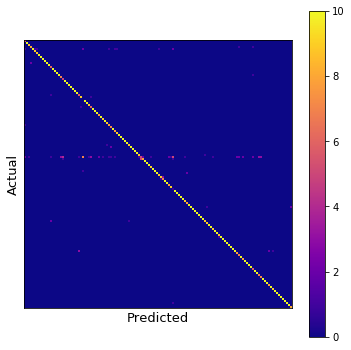


------------------------------
rf
Accuracy: 0.9335820895522389
F1: 0.925771144278607


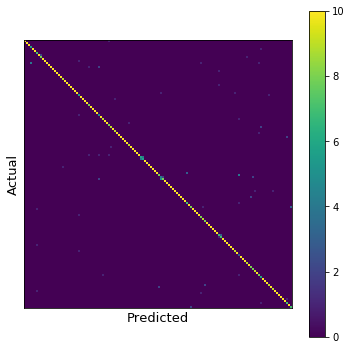


**************************************************
Block 4 scaled
------------------------------
svc
Accuracy: 0.923134328358209
F1: 0.9234597160716562


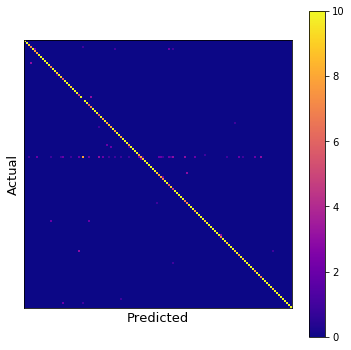


------------------------------
rf
Accuracy: 0.9335820895522389
F1: 0.9262686567164178


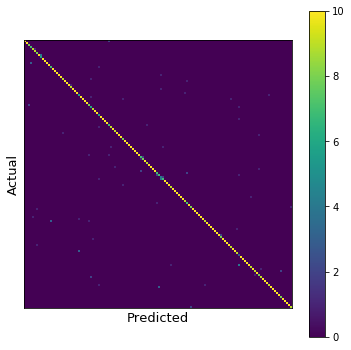


**************************************************
Block 5 scaled
------------------------------
svc
Accuracy: 0.9604477611940299
F1: 0.9578109452736318


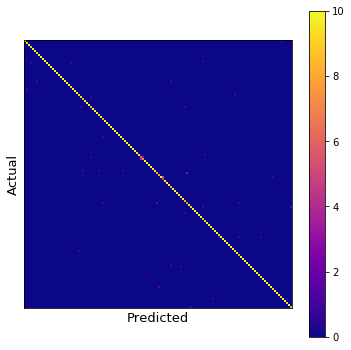


------------------------------
rf
Accuracy: 0.9358208955223881
F1: 0.9298507462686567


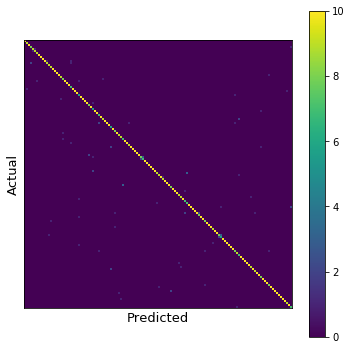


**************************************************
FC1 scaled
------------------------------
svc
Accuracy: 0.9395522388059702
F1: 0.9385799358187418


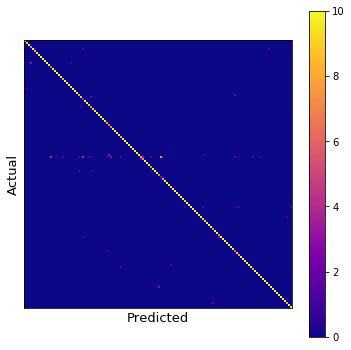


------------------------------
rf
Accuracy: 0.9253731343283581
F1: 0.9174200426439233


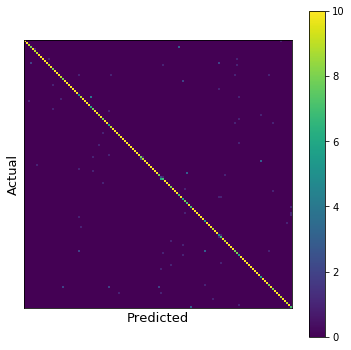


**************************************************
FC2 scaled
------------------------------
svc
Accuracy: 0.9559701492537315
F1: 0.9517910447761194


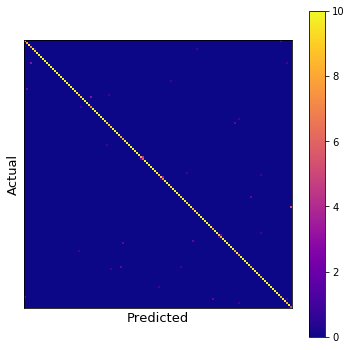


------------------------------
rf
Accuracy: 0.9425373134328359
F1: 0.9369154228855722


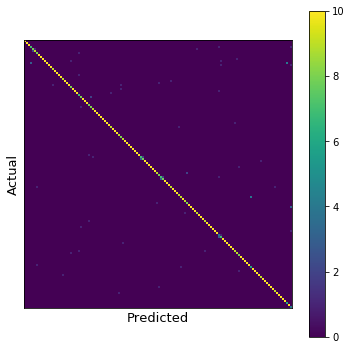

In [62]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    # Iterate over different classifiers
    for classifier, classifier_name, param_grid, cmap in zip(classifiers, 
                                                             classifiers_name, 
                                                             param_grids,
                                                             cmaps):
        print("-"*30)
        print(classifier_name)

        list_acc, list_cm, list_f1, list_cv_results = nested_cv_sklearn(classifier, param_grid, X, y, 5)
        # Add data to dict_results
        dict_results["accuracy"].append(list_acc)
        dict_results["f1"].append(list_f1)
        dict_results["cv_results"].append(list_cv_results)
        dict_results["cm"].append(list_cm)

        # Display accuracy, f1, confusion matrix
        print(f"Accuracy: {np.mean(list_acc)}")
        print(f"F1: {np.mean(list_f1)}")
        cm = sum(list_cm)

        plot_confusion_matrix(cm, cmap=cmap)

        print()
    
    list_dict_results.append(dict_results)

#### Neural Networks

In [63]:
feature_sets = [
#     (X_block3, y_species),
    (X_block3_scaled, y_species),
#     (X_block4, y_species),
    (X_block4_scaled, y_species),
#     (X_block5, y_species),
    (X_block5_scaled, y_species),
#     (X_fc1, y_species),
    (X_fc1_scaled, y_species),
#     (X_fc2, y_species),
    (X_fc2_scaled, y_species),
]
feature_sets_name = [
#     "Block 3",
    "Block 3 scaled",
#     "Block 4",
    "Block 4 scaled",
#     "Block 5",
    "Block 5 scaled",
#     "FC1",
    "FC1 scaled",
#     "FC2",
    "FC2 scaled",
]

In [64]:
# Neural network configuration (simple one for standard)
# see more complex version on utilities.ipynb that are evaluated
# on other files.
optimizer = keras.optimizers.Adam()
batch_size = 64
no_epochs = 200

**************************************************
Block 3 scaled
Accuracy: 0.8716417910447761
F1: 0.833276474769012


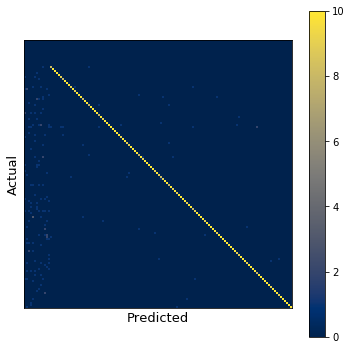


**************************************************
Block 4 scaled
Accuracy: 0.8761194029850745
F1: 0.8362970859985784


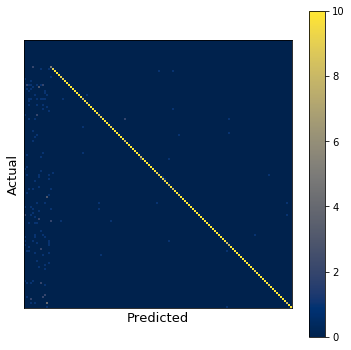


**************************************************
Block 5 scaled
Accuracy: 0.8888059701492537
F1: 0.8532054015636105


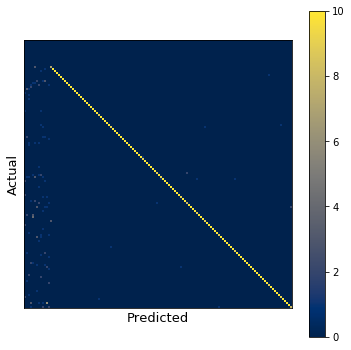


**************************************************
FC1 scaled
Accuracy: 0.8761194029850745
F1: 0.8382302771855011


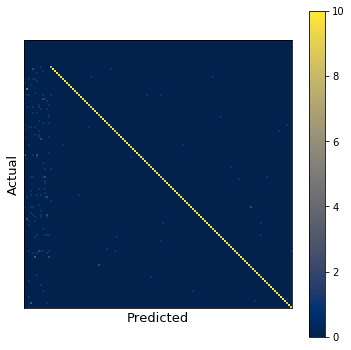


**************************************************
FC2 scaled
Accuracy: 0.8850746268656717
F1: 0.8482681828950485


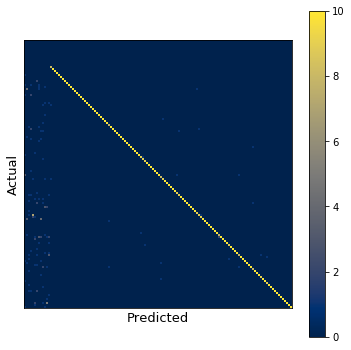

In [66]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    
    # Neural network training
    X = np.array(X)
    y = np.array(y)
    
    # Simple model definition
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(134, activation="softmax"),
        ]
    )
    
    for train, test in kfold.split(X, y):
        model.compile(loss="sparse_categorical_crossentropy",
                     optimizer=optimizer,
                     metrics=["accuracy"])
        
        # Valid data
        valid_range = int(0.1 * len(train))
        valid = train[:valid_range]
        train = train[valid_range:]
        
        # Early stopping callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0, patience=10,
            mode="auto", restore_best_weights=False
        )
        
        # Fit data to model
        history = model.fit(X[train], y[train],
                  batch_size=batch_size,
                  epochs=no_epochs, verbose=0, 
                  validation_data=(X[valid], y[valid]),
                  callbacks=[early_stopping])
        
        # Generate generalisation metrics
        pred = model.predict(X[test])
        pred = np.argmax(pred, axis=1)
        cm = confusion_matrix(pred, y[test])
        acc = accuracy_score(pred, y[test])
        f1 = f1_score(pred, y[test], average="macro")
        
        # Add data to dict results
        dict_results["accuracy"].append(acc)
        dict_results["f1"].append(f1)
        dict_results["cm"].append(cm)
        
    # Display accuracy, f1, confusion matrix
    print(f"Accuracy: {np.mean(dict_results['accuracy'])}")
    print(f"F1: {np.mean(dict_results['f1'])}")
    plot_confusion_matrix(sum(dict_results['cm']), cmap="cividis")

    print()

    list_dict_results.append(dict_results)

## InceptionV3

This section load the InceptionV3 architecture with Imagenet weight to be used as feature extractor.

In [2]:
model = InceptionV3(weights="imagenet", include_top=False, pooling="avg", input_shape=(299, 299, 3))

87916544/87910968 [==============================] - 5s 0us/step


In [3]:
# Set non trainable in our case
for layer in model.layers:
    layer.trainable=False

In [4]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

### Feature Extraction

We extract features using pre-trained VGG16. We consider each convolutional and dense blocks as feature extraction. We aim to compare their performance.

In [6]:
# Store features
X_features_inception_a = []
X_features_inception_b = []

In [10]:
### This cells only for extracting A (cannot do both at the same time,
# memory issue)
for X in tqdm(X_species):
    X_a = X[0] # A position
    X_b = X[1] # B position
    
    # Open the image in gray scale
    image_a = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_a), cv2.IMREAD_COLOR)
    image_b = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_b), cv2.IMREAD_COLOR)
    
    # Preprocess the image
    image_a = cv2.resize(image_a, (299, 299))
    image_b = cv2.resize(image_b, (299, 299))
    
    image_a = cv2.cvtColor(image_a, cv2.COLOR_RGB2BGR)
    image_a = image_a / 255.0
    image_a = np.reshape(image_a, (-1, 299, 299, 3))
    
    image_b = cv2.cvtColor(image_b, cv2.COLOR_RGB2BGR)
    image_b = image_b / 255.0
    image_b = np.reshape(image_b, (-1, 299, 299, 3))
    
    # Block 1 - fc
    X_features_inception_a.append(model.predict(image_a))
    X_features_inception_b.append(model.predict(image_b))

In [34]:
## Save objects
save_object(X_features_inception_a, "../results/inception_a.pickle")
save_object(X_features_inception_b, "../results/inception_b.pickle")

### Further Preprocessing

We further preprocessing the extracted features for later to be used for classification. We used dimensionality reduction method, like PCA.

In [15]:
X_inception_a = load_object("../results/inception_a.pickle")
X_inception_b = load_object("../results/inception_b.pickle")

# Reshape 
X_inception_a = np.reshape(X_inception_a, (1340, -1))
X_inception_b = np.reshape(X_inception_b, (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_inception_a = pca.fit_transform(X_inception_a)
X_inception_b = pca.fit_transform(X_inception_b)

print(X_inception_a.shape)
print(X_inception_b.shape)

X_inception = np.concatenate((X_inception_a, X_inception_b), axis=1)
save_object(X_inception, "../results/X_inception.pickle")

(1340, 195)
(1340, 183)


In [35]:
# Load
X_inception = load_object("../results/X_inception.pickle")
scaler = StandardScaler()
X_inception_scaled = scaler.fit_transform(X_inception)

### Classification

#### Standard ML Models

In [36]:
## Hyperparameter configurations and result storage
param_grid_svc = {
    # random search varying the parameter
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': ["scale", "auto"], 
    'kernel': ["rbf", "linear"]
}

param_grid_rf = { 
    'n_estimators': [10, 100, 200],
    'criterion' :['gini', 'entropy']
}

# Used to store results for different feature sets
list_dict_results = []

In [37]:
## Loop configuration
feature_sets = [
    (X_inception, y_species),
    (X_inception_scaled, y_species),
]
feature_sets_name = [
    "Inception",
    "Inception scaled",
]

## Classifier and hyperparameter loops
param_grids = [param_grid_svc, param_grid_rf]
classifiers_name = ["svc", "rf"]
classifiers = [SVC(), RandomForestClassifier()]
cmaps = ["plasma", "viridis"]

**************************************************
Inception
------------------------------
svc
Accuracy: 0.9529850746268658
F1: 0.9487562189054726


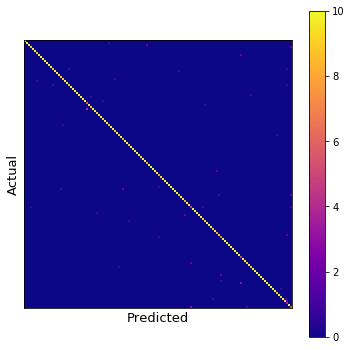


------------------------------
rf
Accuracy: 0.9201492537313433
F1: 0.9101492537313431


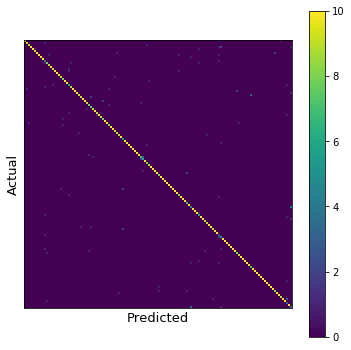


**************************************************
Inception scaled
------------------------------
svc
Accuracy: 0.9611940298507463
F1: 0.958137882018479


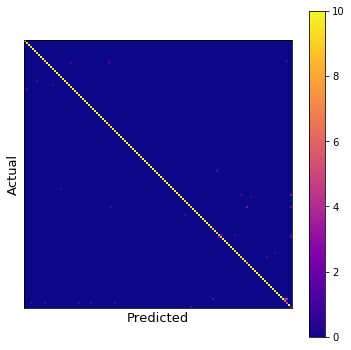


------------------------------
rf
Accuracy: 0.9223880597014926
F1: 0.9136389481165601


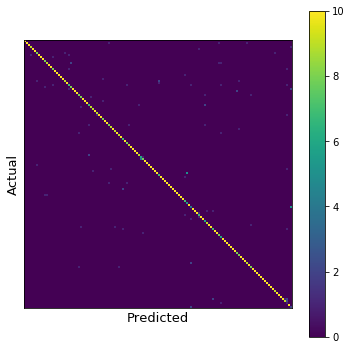

In [38]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    # Iterate over different classifiers
    for classifier, classifier_name, param_grid, cmap in zip(classifiers, 
                                                             classifiers_name, 
                                                             param_grids,
                                                             cmaps):
        print("-"*30)
        print(classifier_name)

        list_acc, list_cm, list_f1, list_cv_results = nested_cv_sklearn(classifier, param_grid, X, y, 5)
        # Add data to dict_results
        dict_results["accuracy"].append(list_acc)
        dict_results["f1"].append(list_f1)
        dict_results["cv_results"].append(list_cv_results)
        dict_results["cm"].append(list_cm)

        # Display accuracy, f1, confusion matrix
        print(f"Accuracy: {np.mean(list_acc)}")
        print(f"F1: {np.mean(list_f1)}")
        cm = sum(list_cm)

        plot_confusion_matrix(cm, cmap=cmap)

        print()
    
    list_dict_results.append(dict_results)

#### Neural Networks

In [39]:
## Loop configuration
feature_sets = [
    (X_inception, y_species),
    (X_inception_scaled, y_species),
]
feature_sets_name = [
    "Inception",
    "Inception scaled",
]


In [40]:
# Neural network configuration (simple one for standard)
# see more complex version on utilities.ipynb that are evaluated
# on other files.
optimizer = keras.optimizers.Adam()
batch_size = 64
no_epochs = 200

**************************************************
Inception
Accuracy: 0.8902985074626866
F1: 0.8565174129353232


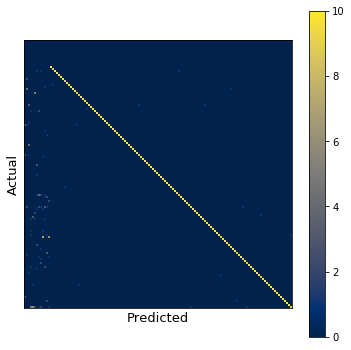


**************************************************
Inception scaled
Accuracy: 0.8813432835820896
F1: 0.843955223880597


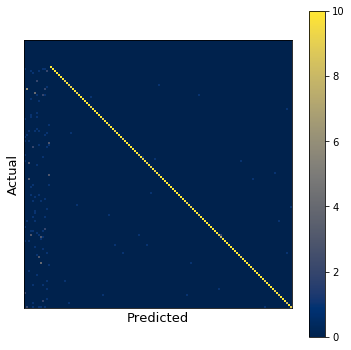

In [43]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    
    # Neural network training
    X = np.array(X)
    y = np.array(y)
    
    # Simple model definition
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu"),
            layers.Dense(128, activation="relu"),
            layers.Dense(255, activation="relu"),
            layers.Dense(134, activation="softmax"),
        ]
    )
    
    for train, test in kfold.split(X, y):
        model.compile(loss="sparse_categorical_crossentropy",
                     optimizer=optimizer,
                     metrics=["accuracy"])
        
        # Valid data
        valid_range = int(0.1 * len(train))
        valid = train[:valid_range]
        train = train[valid_range:]
        
        # Early stopping callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0, patience=100,
            mode="auto", restore_best_weights=False
        )
        
        # Fit data to model
        history = model.fit(X[train], y[train],
                  batch_size=batch_size,
                  epochs=no_epochs, verbose=0, 
                  validation_data=(X[valid], y[valid]),
                  callbacks=[early_stopping])
        
        # Generate generalisation metrics
        pred = model.predict(X[test])
        pred = np.argmax(pred, axis=1)
        cm = confusion_matrix(pred, y[test])
        acc = accuracy_score(pred, y[test])
        f1 = f1_score(pred, y[test], average="macro")
        
        # Add data to dict results
        dict_results["accuracy"].append(acc)
        dict_results["f1"].append(f1)
        dict_results["cm"].append(cm)
        
    # Display accuracy, f1, confusion matrix
    print(f"Accuracy: {np.mean(dict_results['accuracy'])}")
    print(f"F1: {np.mean(dict_results['f1'])}")
    plot_confusion_matrix(sum(dict_results['cm']), cmap="cividis")

    print()

    list_dict_results.append(dict_results)

## ResNet50

This section load the ResNet50 architecture with Imagenet weight to be used as feature extractor.

In [18]:
model = ResNet50(weights="imagenet", include_top=False, pooling="avg", input_shape=(224, 224, 3))

94773248/94765736 [==============================] - 4s 0us/step


In [19]:
# Set non trainable in our case
for layer in model.layers:
    layer.trainable=False

In [20]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### Feature Extraction

We extract features using pre-trained VGG16. We consider each convolutional and dense blocks as feature extraction. We aim to compare their performance.

In [21]:
# Store features
X_features_resnet_a = []
X_features_resnet_b = []

In [22]:
### This cells only for extracting A (cannot do both at the same time,
# memory issue)
for X in tqdm(X_species):
    X_a = X[0] # A position
    X_b = X[1] # B position
    
    # Open the image in gray scale
    image_a = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_a), cv2.IMREAD_COLOR)
    image_b = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_b), cv2.IMREAD_COLOR)
    
    # Preprocess the image
    image_a = cv2.resize(image_a, (224, 224))
    image_b = cv2.resize(image_b, (224, 224))
    
    image_a = cv2.cvtColor(image_a, cv2.COLOR_RGB2BGR)
    image_a = image_a / 255.0
    image_a = np.reshape(image_a, (-1, 224, 224, 3))
    
    image_b = cv2.cvtColor(image_b, cv2.COLOR_RGB2BGR)
    image_b = image_b / 255.0
    image_b = np.reshape(image_b, (-1, 224, 224, 3))
    
    # Block 1 - fc
    X_features_resnet_a.append(model.predict(image_a))
    X_features_resnet_b.append(model.predict(image_b))

In [23]:
## Save objects
save_object(X_features_resnet_a, "../results/resnet_a.pickle")
save_object(X_features_resnet_b, "../results/resnet_b.pickle")

### Further Preprocessing

We further preprocessing the extracted features for later to be used for classification. We used dimensionality reduction method, like PCA.

In [26]:
X_resnet_a = load_object("../results/resnet_a.pickle")
X_resnet_b = load_object("../results/resnet_b.pickle")

# Reshape 
X_resnet_a = np.reshape(X_resnet_a, (1340, -1))
X_resnet_b = np.reshape(X_resnet_b, (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_resnet_a = pca.fit_transform(X_resnet_a)
X_resnet_b = pca.fit_transform(X_resnet_b)

print(X_resnet_a.shape)
print(X_resnet_b.shape)

X_resnet = np.concatenate((X_resnet_a, X_resnet_b), axis=1)
save_object(X_resnet, "../results/X_resnet.pickle")

(1340, 105)
(1340, 94)


In [27]:
# Load
X_resnet = load_object("../results/X_resnet.pickle")
scaler = StandardScaler()
X_resnet_scaled = scaler.fit_transform(X_resnet)

### Classification

#### Standard ML Models

In [28]:
## Hyperparameter configurations and result storage
param_grid_svc = {
    # random search varying the parameter
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': ["scale", "auto"], 
    'kernel': ["rbf", "linear"]
}

param_grid_rf = { 
    'n_estimators': [10, 100, 200],
    'criterion' :['gini', 'entropy']
}

# Used to store results for different feature sets
list_dict_results = []

In [29]:
## Loop configuration
feature_sets = [
    (X_resnet, y_species),
    (X_resnet_scaled, y_species),
]
feature_sets_name = [
    "resnet",
    "resnet scaled",
]

## Classifier and hyperparameter loops
param_grids = [param_grid_svc, param_grid_rf]
classifiers_name = ["svc", "rf"]
classifiers = [SVC(), RandomForestClassifier()]
cmaps = ["plasma", "viridis"]

**************************************************
resnet
------------------------------
svc
Accuracy: 0.8388059701492537
F1: 0.8241506751954513


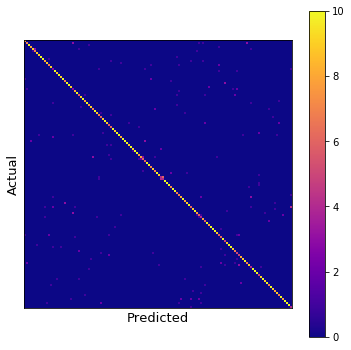


------------------------------
rf
Accuracy: 0.8305970149253732
F1: 0.8145913290689408


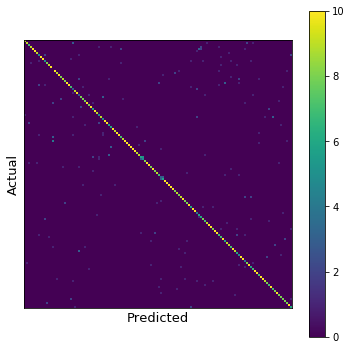


**************************************************
resnet scaled
------------------------------
svc
Accuracy: 0.8940298507462685
F1: 0.8848400852878463


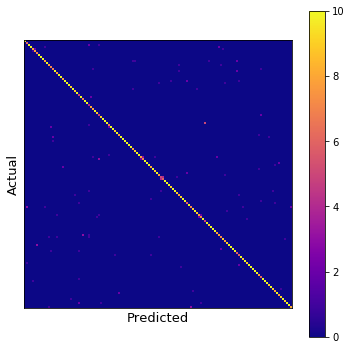


------------------------------
rf
Accuracy: 0.8417910447761194
F1: 0.8287917555081734


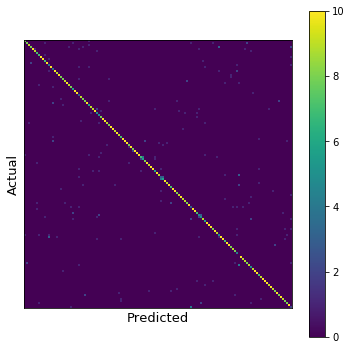

In [30]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    # Iterate over different classifiers
    for classifier, classifier_name, param_grid, cmap in zip(classifiers, 
                                                             classifiers_name, 
                                                             param_grids,
                                                             cmaps):
        print("-"*30)
        print(classifier_name)

        list_acc, list_cm, list_f1, list_cv_results = nested_cv_sklearn(classifier, param_grid, X, y, 5)
        # Add data to dict_results
        dict_results["accuracy"].append(list_acc)
        dict_results["f1"].append(list_f1)
        dict_results["cv_results"].append(list_cv_results)
        dict_results["cm"].append(list_cm)

        # Display accuracy, f1, confusion matrix
        print(f"Accuracy: {np.mean(list_acc)}")
        print(f"F1: {np.mean(list_f1)}")
        cm = sum(list_cm)

        plot_confusion_matrix(cm, cmap=cmap)

        print()
    
    list_dict_results.append(dict_results)

#### Neural Networks

In [31]:
## Loop configuration
feature_sets = [
    (X_resnet, y_species),
    (X_resnet_scaled, y_species),
]
feature_sets_name = [
    "resnet",
    "resnet scaled",
]


In [32]:
# Neural network configuration (simple one for standard)
# see more complex version on utilities.ipynb that are evaluated
# on other files.
optimizer = keras.optimizers.Adam()
batch_size = 64
no_epochs = 200

**************************************************
resnet
Accuracy: 0.8373134328358208
F1: 0.7998531153755033


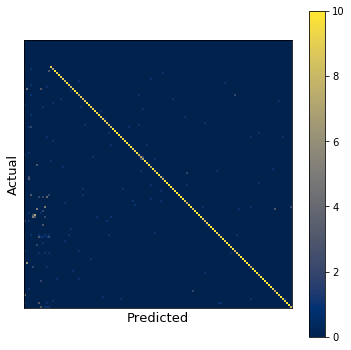


**************************************************
resnet scaled
Accuracy: 0.8686567164179104
F1: 0.83242596541104


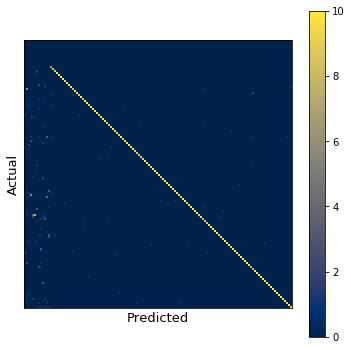

In [33]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    
    # Neural network training
    X = np.array(X)
    y = np.array(y)
    
    # Simple model definition
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(134, activation="softmax"),
        ]
    )
    
    for train, test in kfold.split(X, y):
        model.compile(loss="sparse_categorical_crossentropy",
                     optimizer=optimizer,
                     metrics=["accuracy"])
        
        # Valid data
        valid_range = int(0.1 * len(train))
        valid = train[:valid_range]
        train = train[valid_range:]
        
        # Early stopping callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0, patience=50,
            mode="auto", restore_best_weights=False
        )
        
        # Fit data to model
        history = model.fit(X[train], y[train],
                  batch_size=batch_size,
                  epochs=no_epochs, verbose=0, 
                  validation_data=(X[valid], y[valid]),
                  callbacks=[early_stopping])
        
        # Generate generalisation metrics
        pred = model.predict(X[test])
        pred = np.argmax(pred, axis=1)
        cm = confusion_matrix(pred, y[test])
        acc = accuracy_score(pred, y[test])
        f1 = f1_score(pred, y[test], average="macro")
        
        # Add data to dict results
        dict_results["accuracy"].append(acc)
        dict_results["f1"].append(f1)
        dict_results["cm"].append(cm)
        
    # Display accuracy, f1, confusion matrix
    print(f"Accuracy: {np.mean(dict_results['accuracy'])}")
    print(f"F1: {np.mean(dict_results['f1'])}")
    plot_confusion_matrix(sum(dict_results['cm']), cmap="cividis")

    print()

    list_dict_results.append(dict_results)